# Project: Indicators of Heart Disease #

### EDA ###

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# read the data
df = pd.read_csv('data/heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
# EDA1: rows & columns
print(df.shape)

(445132, 40)


In [4]:
# EDA2: data types
print(df.dtypes)

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [5]:
# EDA3: target variable - HadDepressiveDisorder(Categorical)
df['HadDepressiveDisorder'].describe()

count     442320
unique         2
top           No
freq      350910
Name: HadDepressiveDisorder, dtype: object

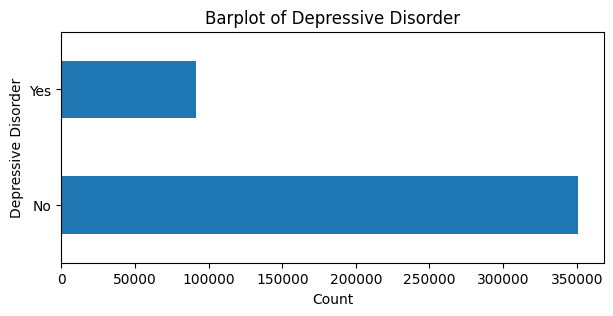

In [6]:
# EDA4: Visualize target variable
plt.figure(figsize=(7,3))
pd.value_counts(df['HadDepressiveDisorder']).plot.barh()
plt.ylabel('Depressive Disorder')
plt.xlabel('Count')
plt.title('Barplot of Depressive Disorder')
plt.show()

In [7]:
# depressive disorder vs general health
general_health_order = ['Poor','Fair','Good','Very good','Excellent']

count_matrix = df.groupby(['GeneralHealth', 'HadDepressiveDisorder']).size().unstack()
count_matrix = count_matrix.reindex(general_health_order)
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

HadDepressiveDisorder      No    Yes
GeneralHealth                       
Poor                    10575   8852
Fair                    39333  20358
Good                   111309  31363
Very good              124305  23491
Excellent               64544   7081


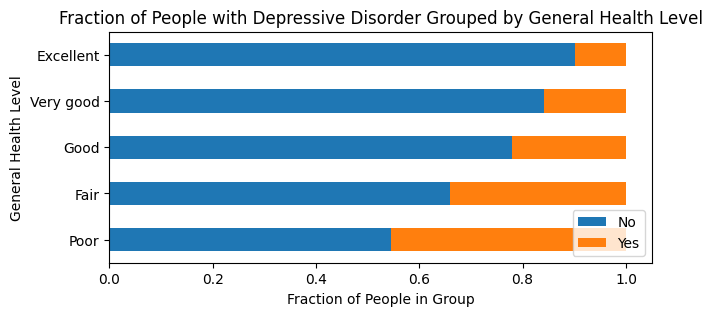

In [8]:
count_matrix_norm.plot(kind='barh', stacked=True,figsize=(7,3))
plt.xlabel('Fraction of People in Group')
plt.ylabel('General Health Level')
plt.title('Fraction of People with Depressive Disorder Grouped by General Health Level')
plt.legend(loc=4)
plt.show()

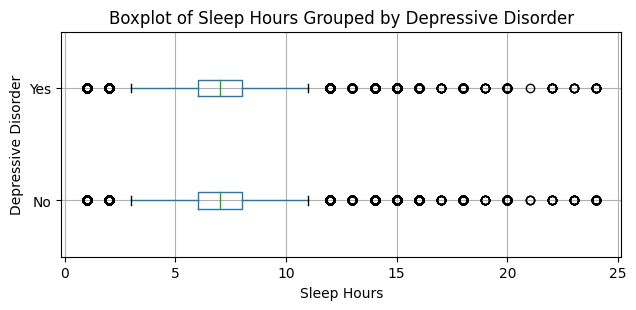

In [9]:
# depressive disorder vs sleep hours
df[['SleepHours','HadDepressiveDisorder']].boxplot(by='HadDepressiveDisorder',vert=False,figsize=(7,3))
plt.xlabel('Sleep Hours')
plt.ylabel('Depressive Disorder')
plt.title('Boxplot of Sleep Hours Grouped by Depressive Disorder')
plt.suptitle('')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


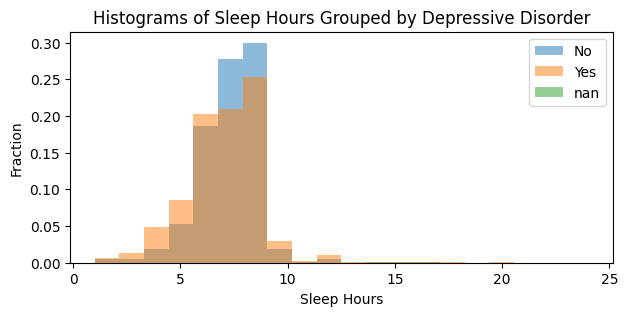

In [10]:
categories = df['HadDepressiveDisorder'].unique()
bin_range = (df['SleepHours'].min(),df['SleepHours'].max())

plt.figure(figsize=(7,3))

for c in categories:
    plt.hist(df[df['HadDepressiveDisorder']==c]['SleepHours'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Sleep Hours')
plt.title('Histograms of Sleep Hours Grouped by Depressive Disorder')
plt.show()

In [11]:
# depressive disorder vs smoker status
count_matrix = df.groupby(['SmokerStatus', 'HadDepressiveDisorder']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

HadDepressiveDisorder                      No    Yes
SmokerStatus                                        
Current smoker - now smokes every day   23650  12064
Current smoker - now smokes some days    9689   4138
Former smoker                           86744  26391
Never smoked                           201569  43067


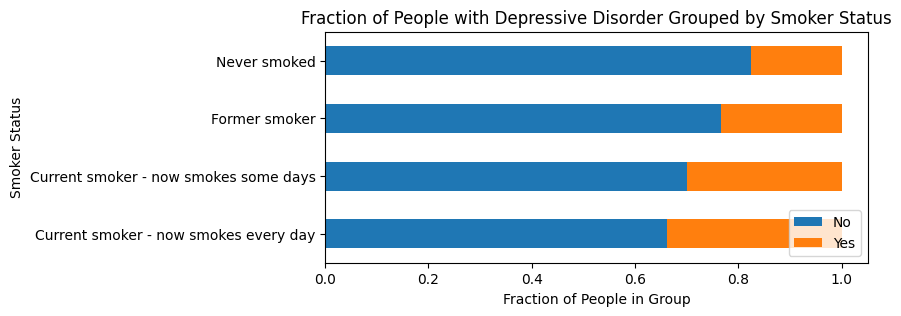

In [12]:
count_matrix_norm.plot(kind='barh', stacked=True,figsize=(7,3))
plt.xlabel('Fraction of People in Group')
plt.ylabel('Smoker Status')
plt.title('Fraction of People with Depressive Disorder Grouped by Smoker Status')
plt.legend(loc=4)
plt.show()

In [13]:
# depressive disorder vs diabetes
count_matrix = df.groupby(['HadDiabetes', 'HadDepressiveDisorder']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

HadDepressiveDisorder                        No    Yes
HadDiabetes                                           
No                                       294745  72006
No, pre-diabetes or borderline diabetes    7525   2715
Yes                                       45407  15348
Yes, but only during pregnancy (female)    2687   1127


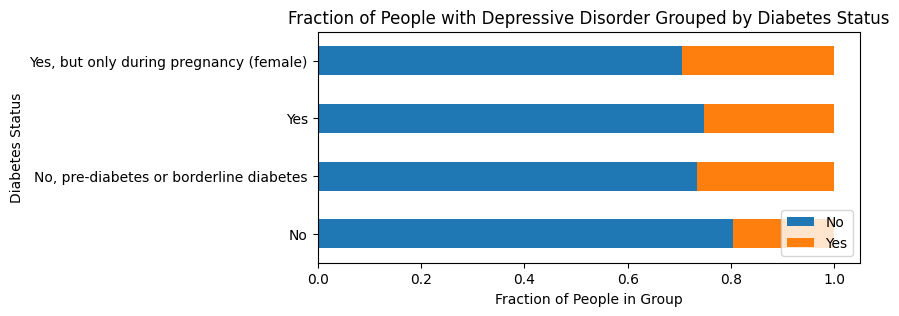

In [14]:
count_matrix_norm.plot(kind='barh', stacked=True,figsize=(7,3))
plt.xlabel('Fraction of People in Group')
plt.ylabel('Diabetes Status')
plt.title('Fraction of People with Depressive Disorder Grouped by Diabetes Status')
plt.legend(loc=4)
plt.show()

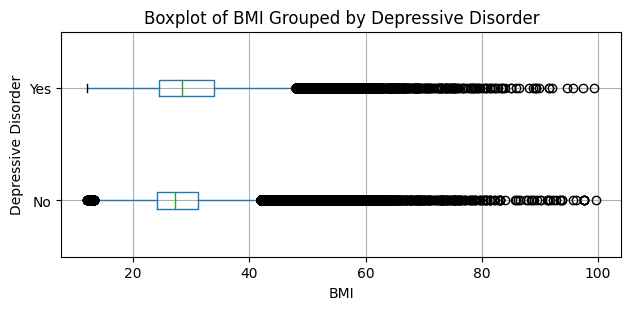

In [15]:
# depressive disorder vs BMI
df[['BMI','HadDepressiveDisorder']].boxplot(by='HadDepressiveDisorder',vert=False,figsize=(7,3))
plt.xlabel('BMI')
plt.ylabel('Depressive Disorder')
plt.title('Boxplot of BMI Grouped by Depressive Disorder')
plt.suptitle('')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


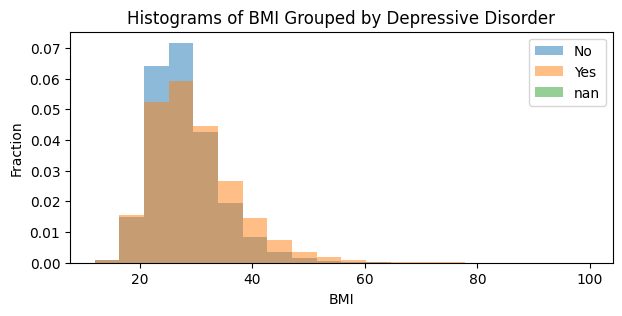

In [16]:
categories = df['HadDepressiveDisorder'].unique()
bin_range = (df['BMI'].min(),df['BMI'].max())

plt.figure(figsize=(7,3))

for c in categories:
    plt.hist(df[df['HadDepressiveDisorder']==c]['BMI'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('BMI')
plt.title('Histograms of BMI Grouped by Depressive Disorder')
plt.show()

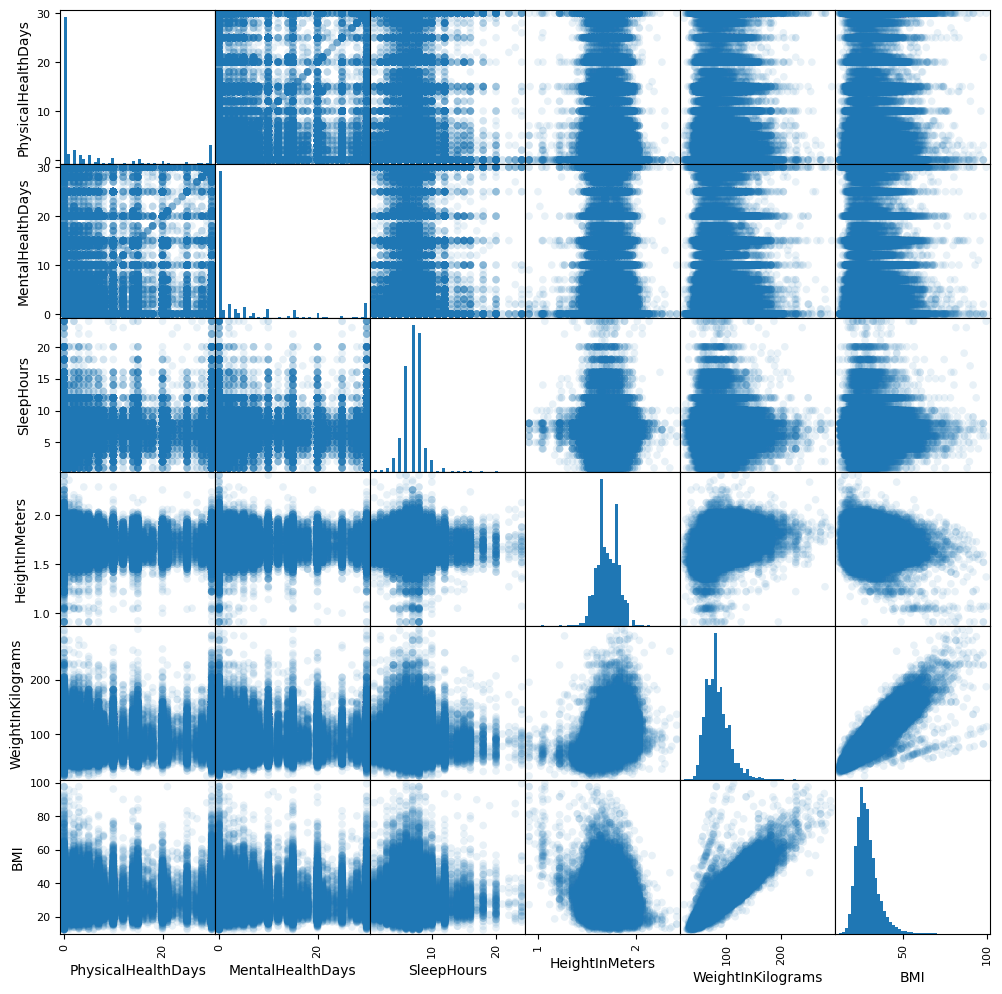

In [17]:
# scatter matrix: columns of float types do not make any sense, need to convert categorical to numerical
# hard to read for presentation
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(12, 12), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

### Split data ###

In [18]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [19]:
# iid, imbalanced, so stratified K fold
# drop unwanted columns
df = df.drop(columns=['LastCheckupTime','HeightInMeters','WeightInKilograms','RemovedTeeth',\
                      'ChestScan','FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap'])
df_yc = df[df['HadDepressiveDisorder'].notna()]
y = df_yc['HadDepressiveDisorder']
X = df_yc.drop(columns=['HadDepressiveDisorder'])
print(y.value_counts())

HadDepressiveDisorder
No     350910
Yes     91410
Name: count, dtype: int64


In [20]:
random_state = 10

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array(['No', 'Yes'], dtype=object), array([70182, 18282]))
new fold
(array(['No', 'Yes'], dtype=object), array([210546,  54846]))
(array(['No', 'Yes'], dtype=object), array([70182, 18282]))
new fold
(array(['No', 'Yes'], dtype=object), array([210546,  54846]))
(array(['No', 'Yes'], dtype=object), array([70182, 18282]))
new fold
(array(['No', 'Yes'], dtype=object), array([210546,  54846]))
(array(['No', 'Yes'], dtype=object), array([70182, 18282]))
new fold
(array(['No', 'Yes'], dtype=object), array([210546,  54846]))
(array(['No', 'Yes'], dtype=object), array([70182, 18282]))


### Preprocess ###

In [21]:
X.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
PhysicalActivities            object
SleepHours                   float64
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
RaceEthnicityCategory         object
AgeCategory                   object
BMI                          float64
A

In [22]:
# missing value
print('data dimensions:',df.shape)
df_c = df.dropna(axis=1)
print('if dropping all columns with missing values:',df_c.shape)
df_r = df.dropna(axis=0)
print('if dropping all rows with missing values:',df_r.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (445132, 32)
if dropping all columns with missing values: (445132, 2)
if dropping all rows with missing values: (304495, 32)
fraction of missing values in features:
GeneralHealth                0.002691
PhysicalHealthDays           0.024548
MentalHealthDays             0.020369
PhysicalActivities           0.002455
SleepHours                   0.012250
HadHeartAttack               0.006886
HadAngina                    0.009896
HadStroke                    0.003498
HadAsthma                    0.003983
HadSkinCancer                0.007061
HadCOPD                      0.004985
HadDepressiveDisorder        0.006317
HadKidneyDisease             0.004327
HadArthritis                 0.005915
HadDiabetes                  0.002442
DeafOrHardOfHearing          0.046384
BlindOrVisionDifficulty      0.048444
DifficultyConcentrating      0.054456
DifficultyWalking            0.053944
DifficultyDressingBathing    0.053726
DifficultyErrands            0.057637
SmokerStatus        

In [23]:
X.shape

(442320, 31)

In [24]:
X.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [25]:
# collect the various features
cat_ftrs = ['State','Sex','PhysicalActivities','HadHeartAttack','HadAngina','HadStroke',\
            'HadAsthma','HadSkinCancer','HadCOPD','HadKidneyDisease','HadArthritis',\
            'HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty',\
            'DifficultyConcentrating','DifficultyWalking',\
            'DifficultyDressingBathing','DifficultyErrands','RaceEthnicityCategory',\
            'AlcoholDrinkers','HIVTesting','HighRiskLastYear','CovidPos']
ordinal_ftrs = ['GeneralHealth','SmokerStatus','ECigaretteUsage','AgeCategory']
ordinal_cats = [['NA','Poor','Fair','Good','Very good','Excellent'],['NA','Never smoked',\
                'Former smoker','Current smoker - now smokes every day','Current smoker - now smokes some days'],\
                ['NA','Never used e-cigarettes in my entire life','Not at all (right now)',\
                 'Use them some days','Use them every day'],['NA','Age 18 to 24','Age 25 to 29','Age 30 to 34',\
                'Age 35 to 39','Age 40 to 44','Age 45 to 49','Age 50 to 54','Age 55 to 59','Age 60 to 64',\
                'Age 65 to 69','Age 70 to 74','Age 75 to 79','Age 80 or older']]
num_ftrs = ['PhysicalHealthDays','MentalHealthDays','SleepHours','BMI']

In [26]:
# one-hot encoder
# replace the NaN with a string
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
# replace the NaN with a string
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(265392, 31)
(265392, 133)
[[ 2.95361766 -0.52007991 -0.01740441 ...  1.          1.
  12.        ]
 [-0.50024217 -0.52007991 -0.01740441 ...  2.          1.
   6.        ]
 [-0.50024217 -0.52007991 -1.34790724 ...  1.          1.
   0.        ]
 ...
 [-0.03972752  0.19700784  1.31309842 ...  2.          1.
  12.        ]
 [-0.50024217  3.06535886 -0.68265583 ...  1.          1.
   8.        ]
 [-0.38511351 -0.16153603 -0.01740441 ...  1.          1.
  10.        ]]
